# Trial 2 Undergraduate Thesis
Goal :
- Create XGBoost and Linear Regresion Model
- Get insights from the datas
- Get the best blanket configuration

Name : Husni Naufal Zuhdi (413821)

In [1]:
# Basic Numerical Packages
import numpy as np
import pandas as pd
import csv as csv
import os

# Ploting Packages
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from pylab import *

# XGBoost and Machine Learning related Packages
# import xgboost as xgb
# from xgboost import plot_importance
# import sklearn
# from sklearn import metrics
# from sklearn.model_selection import cross_validate, cross_val_score, KFold, train_test_split, GridSearchCV
# from scipy.stats import skew
# from collections import OrderedDict

In [22]:
# Read folder contain simulation results
path = "/home/ubuntu/iter-tritium-breeding-xgboost/jupyter-notebooks/2-data-analysis/result"
results = os.listdir(path=path)
results.sort()

In [23]:
# Read data in each folder
data = []
for result in results:
    # Find enrichment feature
    folder_path = path + str(result)
    folder_list = result.split('-')
    folder_list = folder_list[0:3]
    
    # Read tbr and std dev data
    try:
        json_result = pd.read_json(path + "/" + result)
        json_result = json_result["blanket_fluid_mat_(n,Xt)"]["events per source particle"]
        data.append([folder_list[0], folder_list[1], folder_list[2], json_result['result'], json_result['std. dev.']])
    except Exception:
        pass

# Build dataframe from simulation data
df = pd.DataFrame(data, columns=['Li6_enrichment', 'Moderator_ratio','Neutron_multiplier', 'Tbr_OpenMC', 'Stddev'])

# Convert all dataframe type from string into float
df.Li6_enrichment = df.Li6_enrichment.astype(float)
df.Moderator_ratio = df.Moderator_ratio.astype(float)
df.Neutron_multiplier = df.Neutron_multiplier.astype(float)

In [33]:
# Build dataframe df_copy
df_copy = df.copy()
for i in range(0, len(df)):
    df_copy['Tbr_OpenMC'][i] = str(round(df_copy['Tbr_OpenMC'][i], 6)) + str(u"\u00B1") + str(round(df_copy['Stddev'][i], 6))
# df_copy

# # Export an excel file
datatoexcel = pd.ExcelWriter('df_edited.xlsx')
df_copy.to_excel(datatoexcel)
datatoexcel.save()

<ipython-input-33-f82328ea5118>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Tbr_OpenMC'][i] = str(round(df_copy['Tbr_OpenMC'][i], 6)) + str(u"\u00B1") + str(round(df_copy['Stddev'][i], 6))


In [32]:
# Export dataframe to csv
df.to_csv("iter_tritium_breeding.csv", index=False)

# Export an excel file
datatoexcel = pd.ExcelWriter('df.xlsx')
df.to_excel(datatoexcel)
datatoexcel.save()

# Exploratory Data Analysis

In [2]:
# Read dataset
df = pd.read_csv('iter_tritium_breeding.csv')
df.describe()

,Li6_enrichment,Moderator_ratio,Neutron_multiplier,Tbr_OpenMC,Stddev
count,180.000000,180.000000,180.000000,180.000000,180.000000
mean,0.500000,0.416667,0.416667,0.893771,0.003486
std,0.283632,0.319304,0.319304,0.070392,0.000584
min,0.100000,0.000000,0.000000,0.673701,0.001948
25%,0.300000,0.100000,0.100000,0.856910,0.003090
50%,0.500000,0.400000,0.400000,0.903328,0.003447
75%,0.700000,0.700000,0.700000,0.944982,0.003853
max,0.900000,0.900000,0.900000,1.014225,0.005278


In [40]:
# Build an dataframe for blanket design without moderator and neutron multiplier
df_first = df.loc[(df["Moderator_ratio"] == 0.0) & (df["Neutron_multiplier"] == 0.0)]

# # Export an excel file for blanket design without moderator and neutron multiplier
# datatoexcel = pd.ExcelWriter('df_first.xlsx')
# df_first.to_excel(datatoexcel)
# datatoexcel.save()

[Text(0.5, 0, 'Pengayaan Litium-6 (%)'), Text(0, 0.5, 'TBR')]

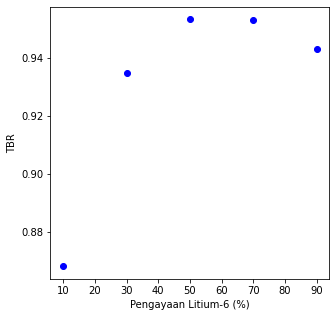

In [9]:
# Plot each 6Li vs TBR for df_first
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(df_first.Li6_enrichment*100, df_first.Tbr_OpenMC, c = "blue", marker = "o")
ax.set(xlabel='Pengayaan Litium-6 (%)', ylabel='TBR')

# Export df_first.png
# plt.savefig('df_first.png')

In [41]:
df_first

,Li6_enrichment,Moderator_ratio,Neutron_multiplier,Tbr_OpenMC,Stddev
0,0.1,0.0,0.0,0.868011,0.003139
36,0.3,0.0,0.0,0.934646,0.003598
72,0.5,0.0,0.0,0.953263,0.003482
108,0.7,0.0,0.0,0.952990,0.003802
144,0.9,0.0,0.0,0.943055,0.004092


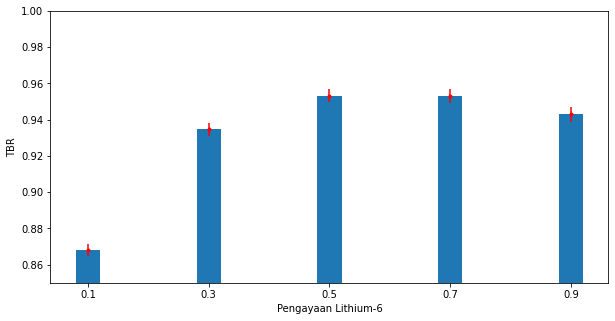

In [60]:
plt.subplots(1, 1, figsize=(10, 5))
X = unique(np.asarray(df_first.Li6_enrichment))
Y = df_first.Tbr_OpenMC
y_err = df_first.Stddev

X_axis = np.arange(len(X))
plt.bar(X_axis, Y, 0.2)
plt.errorbar(X_axis, Y, yerr = y_err, fmt=".", c="r")

plt.xticks(X_axis, X)
plt.xlabel("Pengayaan Lithium-6")
plt.ylabel("TBR")
plt.ylim([0.85, 1.0])
plt.show()

In [3]:
# Build an dataframe for blanket design with moderator without neutron multiplier
df_second = df.loc[(df["Neutron_multiplier"] == 0.0) & (df["Moderator_ratio"] != 0.0)]

# Export an excel file for blanket design with moderator without neutron multiplier
# datatoexcel = pd.ExcelWriter('df_second.xlsx')
# df_second.to_excel(datatoexcel)
# datatoexcel.save()

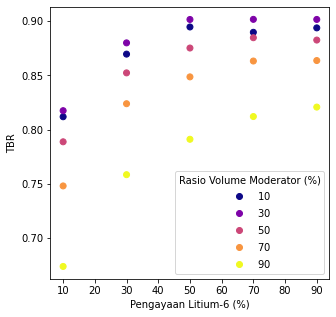

In [14]:
# Plot each 6Li vs TBR for df_first
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
scatter = ax.scatter(df_second.Li6_enrichment*100, df_second.Tbr_OpenMC, c = df_second.Moderator_ratio*100, marker = "o", cmap=cm.plasma)
ax.set(xlabel='Pengayaan Litium-6 (%)', ylabel='TBR')
legend = plt.legend(*scatter.legend_elements(), loc="lower right", title="Rasio Volume Moderator (%)")

# Export df_second.png
# plt.savefig('df_second.png')

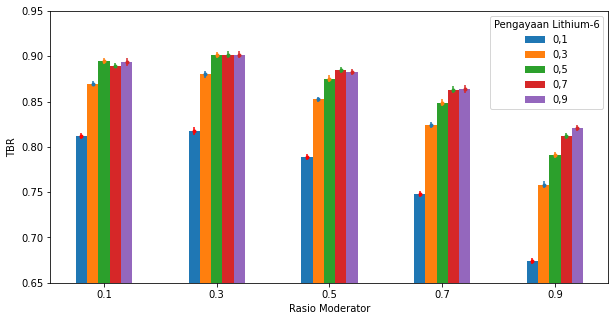

In [39]:
plt.subplots(1, 1, figsize=(10, 5))
X = unique(np.asarray(df_second.Moderator_ratio))

dfSecLi = []
Li = []
errLi = []
for i in [1, 3, 5, 7, 9]:
    dfSecLi.append(list(df_second.loc[(df["Li6_enrichment"] == (round(float(i) * 0.1, 2)))].index))
    Li.append(list(df_second['Tbr_OpenMC'][dfSecLi[-1]].values))
    errLi.append(list(df_second['Stddev'][dfSecLi[-1]].values))

X_axis = np.arange(len(X))

for i in range(5):
    if i == 0:
        plt.bar(X_axis - 0.2, Li[i], 0.1, label = '0,1')
        plt.errorbar(X_axis - 0.2, Li[i], yerr = errLi[i], fmt=".", c="r")
    else :
        plt.bar(X_axis - 0.2 + (0.1 * i), Li[i], 0.1, label = f'0,{(i*2)+1}')
        plt.errorbar(X_axis - 0.2 + (0.1 * i), Li[i], yerr = errLi[i], fmt=".")

plt.xticks(X_axis, X)
plt.xlabel("Rasio Moderator")
plt.ylabel("TBR")
plt.legend(loc="upper right", title="Pengayaan Lithium-6")
plt.ylim([0.65, 0.95])
plt.show()

In [38]:
dfSecLi

[[6, 12, 18, 24, 30],
 [42, 48, 54, 60, 66],
 [78, 84, 90, 96, 102],
 [114, 120, 126, 132, 138],
 [150, 156, 162, 168, 174]]

In [7]:
# Build an dataframe for blanket design with moderator and neutron multiplier
df_third = df.loc[(df["Neutron_multiplier"] != 0.0) & (df["Moderator_ratio"] != 0.0)]

# Export an excel file for blanket design with moderator and neutron multiplier
# datatoexcel = pd.ExcelWriter('df_third.xlsx')
# df_third.to_excel(datatoexcel)
# datatoexcel.save()

In [29]:
# Build diferent dataframes for each neutron multiplier
df_third_1 = df.loc[(df["Neutron_multiplier"] == 0.1) & (df["Moderator_ratio"] != 0.0)]
df_third_3 = df.loc[(df["Neutron_multiplier"] == 0.3) & (df["Moderator_ratio"] != 0.0)]
df_third_5 = df.loc[(df["Neutron_multiplier"] == 0.5) & (df["Moderator_ratio"] != 0.0)]
df_third_7 = df.loc[(df["Neutron_multiplier"] == 0.7) & (df["Moderator_ratio"] != 0.0)]
df_third_9 = df.loc[(df["Neutron_multiplier"] == 0.9) & (df["Moderator_ratio"] != 0.0)]

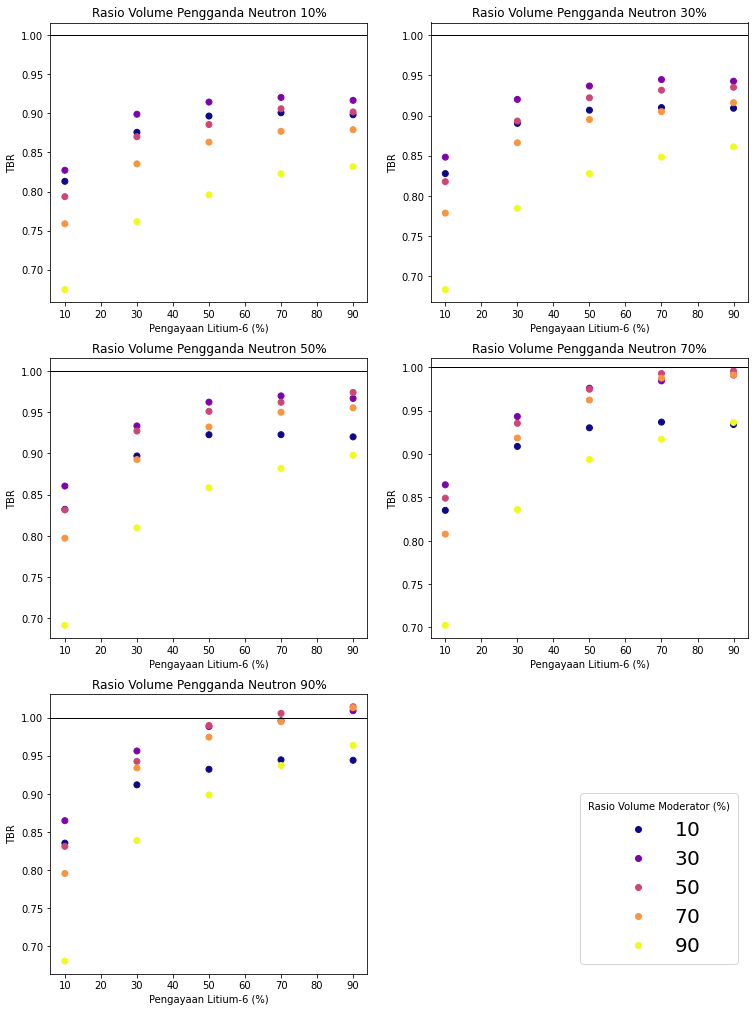

In [31]:
# Plot each 6Li vs TBR for df_third
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(12.5, 17.5))

# AX1
scatter = ax1.scatter(df_third_1.Li6_enrichment*100, df_third_1.Tbr_OpenMC, c = df_third_1.Moderator_ratio*100, marker = "o", cmap=cm.plasma)
ax1.set_title("Rasio Volume Pengganda Neutron 10%")
ax1.set(xlabel='Pengayaan Litium-6 (%)', ylabel='TBR')
ax1.axhline(y=1, linewidth=1, color='k')

# AX2
scatter = ax2.scatter(df_third_3.Li6_enrichment*100, df_third_3.Tbr_OpenMC, c = df_third_3.Moderator_ratio*100, marker = "o", cmap=cm.plasma)
ax2.set_title("Rasio Volume Pengganda Neutron 30%")
ax2.set(xlabel='Pengayaan Litium-6 (%)', ylabel='TBR')
ax2.axhline(y=1, linewidth=1, color='k')

# AX3
scatter = ax3.scatter(df_third_5.Li6_enrichment*100, df_third_5.Tbr_OpenMC, c = df_third_5.Moderator_ratio*100, marker = "o", cmap=cm.plasma)
ax3.set_title("Rasio Volume Pengganda Neutron 50%")
ax3.set(xlabel='Pengayaan Litium-6 (%)', ylabel='TBR')
ax3.axhline(y=1, linewidth=1, color='k')

# AX4
scatter = ax4.scatter(df_third_7.Li6_enrichment*100, df_third_7.Tbr_OpenMC, c = df_third_7.Moderator_ratio*100, marker = "o", cmap=cm.plasma)
ax4.set_title("Rasio Volume Pengganda Neutron 70%")
ax4.set(xlabel='Pengayaan Litium-6 (%)', ylabel='TBR')
ax4.axhline(y=1, linewidth=1, color='k')

# AX5
scatter = ax5.scatter(df_third_9.Li6_enrichment*100, df_third_9.Tbr_OpenMC, c = df_third_9.Moderator_ratio*100, marker = "o", cmap=cm.plasma)
ax5.set_title("Rasio Volume Pengganda Neutron 90%")
ax5.set(xlabel='Pengayaan Litium-6 (%)', ylabel='TBR')
ax5.axhline(y=1, linewidth=1, color='k')

# AX6
ax6.axis('off')
legend = plt.legend(*scatter.legend_elements(), loc="lower right", title="Rasio Volume Moderator (%)", prop={'size': 20})

# Export df_third.png
# plt.savefig('df_third.png')

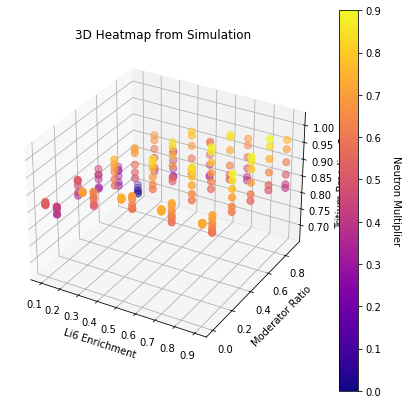

In [51]:
# Produce Heatmap Scattering
# Read the dataset
x = df["Li6_enrichment"].tolist()
y = df["Moderator_ratio"].tolist()
z = df["Tbr_OpenMC"].tolist()

colo = df["Neutron_multiplier"].tolist()

# Creating 3d figures
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Configuring colorbar
color_map = cm.ScalarMappable(cmap=cm.plasma)
color_map.set_array(colo)

# Creating the heatmap
img = ax.scatter(x, y, z, marker='o', s=50, c=z, cmap=cm.plasma)
heatmap = plt.colorbar(color_map)
heatmap.set_label('Neutron Multiplier', rotation=270, labelpad=20)

# Adding title and labels
ax.set_title("3D Heatmap from Simulation")
ax.set_xlabel('Li6 Enrichment')
ax.set_ylabel('Moderator Ratio')
ax.set_zlabel('Tritium Breeding Ratio')

# Displaying plot
plt.show()

In [26]:
# See the best blanket design
df.sort_values(by=['Tbr_OpenMC'], ascending=False).head(10)

,Li6_enrichment,Moderator_ratio,Neutron_multiplier,Tbr_OpenMC,Stddev
167,0.9,0.5,0.9,1.014225,0.003413
173,0.9,0.7,0.9,1.012842,0.004387
161,0.9,0.3,0.9,1.008993,0.003505
131,0.7,0.5,0.9,1.005552,0.004294
125,0.7,0.3,0.9,0.995924,0.003419
166,0.9,0.5,0.7,0.995918,0.003552
137,0.7,0.7,0.9,0.994566,0.003919
130,0.7,0.5,0.7,0.993001,0.005239
160,0.9,0.3,0.7,0.991248,0.003629
172,0.9,0.7,0.7,0.991240,0.004500


# Preprocessing

In [126]:
# Split dataset into train and test datasets
features_columns = [col for col in df.columns if col not in ['Tbr_OpenMC', 'Stddev']]
X_train, X_test, y_train, y_test = train_test_split(df[features_columns],df['Tbr_OpenMC'],test_size=.3, random_state=42)

In [127]:
# Load data into DMatrices
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [ ]:
# Split dataset into train and test datasets
features_columns = [col for col in df.columns if col not in ['Tbr_OpenMC', 'Stddev']]
X_train, X_test, y_train, y_test = train_test_split(df[features_columns],df['Tbr_OpenMC'],test_size=.4, random_state=42)

# Build Machine Learning Model
# !This project abandoned from my undergrauduate thesis because the data generated from OpenMC is not robust enough!

## Set Initial Hyperparameters

In [128]:
# First hyperparameters
params = {
    # Parameters that we are going to tune.
    'max_depth':5,
    'min_child_weight': 1,
    'eta':.1,
    'subsample': 1,
    'colsample_bytree': 1,
    'gamma': 0,
    'reg_alpha': 0,
    'reg_lambda': 0,
    # Other parameters
    'objective':'reg:squarederror',
    'eval_metric':['rmse', 'mae'],
}

In [133]:
# First Model
model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=[(dtrain, "Train"), (dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Train-rmse:0.36760	Train-mae:0.36173	Test-rmse:0.35235	Test-mae:0.34276
[1]	Train-rmse:0.33207	Train-mae:0.32556	Test-rmse:0.31727	Test-mae:0.30659
[2]	Train-rmse:0.30022	Train-mae:0.29300	Test-rmse:0.28594	Test-mae:0.27403
[3]	Train-rmse:0.27170	Train-mae:0.26370	Test-rmse:0.25799	Test-mae:0.24473
[4]	Train-rmse:0.24618	Train-mae:0.23733	Test-rmse:0.23313	Test-mae:0.21836
[5]	Train-rmse:0.22339	Train-mae:0.21368	Test-rmse:0.21106	Test-mae:0.19591
[6]	Train-rmse:0.20306	Train-mae:0.19304	Test-rmse:0.19154	Test-mae:0.17684
[7]	Train-rmse:0.18497	Train-mae:0.17472	Test-rmse:0.17435	Test-mae:0.15967
[8]	Train-rmse:0.16890	Train-mae:0.15823	Test-rmse:0.15927	Test-mae:0.14422
[9]	Train-rmse:0.15466	Train-mae:0.14344	Test-rmse:0.14612	Test-mae:0.13094
[10]	Train-rmse:0.14208	Train-mae:0.13030	Test-rmse:0.13472	Test-mae:0.11993
[11]	Train-rmse:0.13102	Train-mae:0.11863	Test-rmse:0.12492	Test-mae:0.11016
[12]	Train-rmse:0.12131	Train-mae:0.10840	Test-rmse:0.11657	Test-mae:0.10241
[13]	Trai

In [130]:
print("Best RMSE: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

Best RMSE: 0.01 with 67 rounds


In [134]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=1000,
    seed=42,
    nfold=10,
    metrics={'rmse', 'mae'},
    early_stopping_rounds=10
)
cv_results

,train-mae-mean,train-mae-std,train-rmse-mean,train-rmse-std,test-mae-mean,test-mae-std,test-rmse-mean,test-rmse-std
0,0.361731,0.001549,0.367596,0.001357,0.361586,0.015491,0.367243,0.013424
1,0.325558,0.001394,0.332062,0.001187,0.325413,0.015645,0.331697,0.013351
2,0.293002,0.001254,0.300212,0.001034,0.292858,0.015785,0.299837,0.013241
3,0.263702,0.001129,0.271691,0.000898,0.263557,0.015910,0.271306,0.013093
4,0.237332,0.001016,0.246178,0.000779,0.237187,0.016023,0.245785,0.012909
...,...,...,...,...,...,...,...,...
102,0.051312,0.001161,0.065375,0.001676,0.051770,0.009253,0.064474,0.014003
103,0.051312,0.001161,0.065375,0.001676,0.051770,0.009253,0.064474,0.014003
104,0.051312,0.001161,0.065375,0.001676,0.051770,0.009253,0.064474,0.014003
105,0.051312,0.001161,0.065375,0.001676,0.051770,0.009253,0.064474,0.014003


In [132]:
# You can try wider intervals with a larger step between
# each value and then narrow it down. Here after several
# iteration I found that the optimal value was in the
# following ranges.
gridsearch_params = [
    (max_depth, min_child_weight, gamma)
    for max_depth in range(1,11)
    for min_child_weight in range(1,11)
    for gamma in [i/10. for i in range(0,9)]
]

# Define initial best params and RMSE
min_rmse = float("Inf")
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight, gamma in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}, gamma={}".format(
                             max_depth,
                             min_child_weight,
                             gamma))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    params['gamma'] = gamma
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=1000,
        seed=42,
        nfold=10,
        metrics={'rmse', 'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_rmse = cv_results['test-rmse-mean'].min()
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} and MAE {} for {} rounds".format(mean_rmse, mean_mae, boost_rounds))
    if (mean_rmse < min_rmse) & (mean_mae < min_mae):
        min_rmse = mean_rmse
        min_mae = mean_mae
        best_params = (max_depth, min_child_weight, gamma)
print("Best params: {}, {}, {}, RMSE and MAE: {} and {}".format(best_params[0], best_params[1], best_params[2], min_rmse, min_mae))

CV with max_depth=1, min_child_weight=1, gamma=0.0
	RMSE 0.026100699999999998 and MAE 0.020352000000000002 for 324 rounds
CV with max_depth=1, min_child_weight=1, gamma=0.1
	RMSE 0.0571384 and MAE 0.0447173 for 97 rounds
CV with max_depth=1, min_child_weight=1, gamma=0.2
	RMSE 0.0634179 and MAE 0.0506656 for 112 rounds
CV with max_depth=1, min_child_weight=1, gamma=0.3
	RMSE 0.06447359999999999 and MAE 0.0517701 for 106 rounds
CV with max_depth=1, min_child_weight=1, gamma=0.4
	RMSE 0.06447359999999999 and MAE 0.0517701 for 106 rounds
CV with max_depth=1, min_child_weight=1, gamma=0.5
	RMSE 0.06447359999999999 and MAE 0.0517701 for 106 rounds
CV with max_depth=1, min_child_weight=1, gamma=0.6
	RMSE 0.06447359999999999 and MAE 0.0517701 for 106 rounds
CV with max_depth=1, min_child_weight=1, gamma=0.7
	RMSE 0.06447359999999999 and MAE 0.0517701 for 106 rounds
CV with max_depth=1, min_child_weight=1, gamma=0.8
	RMSE 0.06447359999999999 and MAE 0.0517701 for 106 rounds
CV with max_depth=1

In [135]:
# Update first and second parameters
params['max_depth'] = best_params[0]
params['min_child_weight'] = best_params[1]
params['gamma'] = best_params[2]

In [136]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(6,11)]
    for colsample in [i/10. for i in range(6,11)]
]

min_rmse = float("Inf")
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
        subsample,
        colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=1000,
        seed=42,
        nfold=5,
        metrics={'rmse', 'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_rmse = cv_results['test-rmse-mean'].min()
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} and MAE {} for {} rounds".format(mean_rmse, mean_mae, boost_rounds))
    if (mean_rmse < min_rmse) & (mean_mae < min_mae):
        min_rmse = mean_rmse
        min_mae = mean_mae
        best_params = (subsample,colsample,gamma)
print("Best params: {}, {}, RMSE and MAE: {} and {}".format(best_params[0], best_params[1], min_rmse, min_mae))

CV with subsample=1.0, colsample=1.0
	RMSE 0.0094292 and MAE 0.007237 for 125 rounds
CV with subsample=1.0, colsample=0.9
	RMSE 0.0130194 and MAE 0.009620799999999999 for 177 rounds
CV with subsample=1.0, colsample=0.8
	RMSE 0.0130194 and MAE 0.009620799999999999 for 177 rounds
CV with subsample=1.0, colsample=0.7
	RMSE 0.0130194 and MAE 0.009620799999999999 for 177 rounds
CV with subsample=1.0, colsample=0.6
	RMSE 0.027990200000000003 and MAE 0.0210254 for 142 rounds
CV with subsample=0.9, colsample=1.0
	RMSE 0.0079252 and MAE 0.0059283999999999995 for 323 rounds
CV with subsample=0.9, colsample=0.9
	RMSE 0.013196999999999997 and MAE 0.009359200000000002 for 275 rounds
CV with subsample=0.9, colsample=0.8
	RMSE 0.013196999999999997 and MAE 0.009359200000000002 for 275 rounds
CV with subsample=0.9, colsample=0.7
	RMSE 0.013196999999999997 and MAE 0.009359200000000002 for 275 rounds
CV with subsample=0.9, colsample=0.6
	RMSE 0.0283772 and MAE 0.0215446 for 111 rounds
CV with subsample=0

In [137]:
# Update third and fourth parameters
params['subsample'] = best_params[0]
params['colsample_bytree'] = best_params[1]

In [138]:
# You can try wider intervals with a larger step between
# each value and then narrow it down. Here after several
# iteration I found that the optimal value was in the
# following ranges.
gridsearch_params = [
    (reg_alpha, reg_lambda)
    for reg_alpha in [i/10. for i in range(1,11)]
    for reg_lambda in [i/10. for i in range(1,11)]
]

# Define initial best params and RMSE
min_rmse = float("Inf")
min_mae = float("Inf")
best_params = None
for reg_alpha, reg_lambda in gridsearch_params:
    print("CV with reg_alpha={}, reg_lambda={}".format(reg_alpha, reg_lambda))
    # Update our parameters
    params['reg_alpha'] = reg_alpha
    params['reg_lambda'] = reg_lambda
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=1000,
        seed=42,
        nfold=5,
        metrics={'rmse', 'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_rmse = cv_results['test-rmse-mean'].min()
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} and MAE {} for {} rounds".format(mean_rmse, mean_mae, boost_rounds))
    if (mean_rmse < min_rmse) & (mean_mae < min_mae):
        min_rmse = mean_rmse
        min_mae = mean_mae
        best_params = (reg_alpha, reg_lambda)
print("Best params: {} and {} RMSE and MAE: {} and {}".format(best_params[0], best_params[1], min_rmse, min_mae))

CV with reg_alpha=0.1, reg_lambda=0.1
	RMSE 0.0156588 and MAE 0.011715800000000002 for 354 rounds
CV with reg_alpha=0.1, reg_lambda=0.2
	RMSE 0.014981799999999998 and MAE 0.0117374 for 356 rounds
CV with reg_alpha=0.1, reg_lambda=0.3
	RMSE 0.014910600000000001 and MAE 0.0116806 for 352 rounds
CV with reg_alpha=0.1, reg_lambda=0.4
	RMSE 0.0149198 and MAE 0.0117702 for 351 rounds
CV with reg_alpha=0.1, reg_lambda=0.5
	RMSE 0.014648 and MAE 0.011374 for 348 rounds
CV with reg_alpha=0.1, reg_lambda=0.6
	RMSE 0.015093 and MAE 0.0117876 for 567 rounds
CV with reg_alpha=0.1, reg_lambda=0.7
	RMSE 0.014932800000000001 and MAE 0.0116734 for 594 rounds
CV with reg_alpha=0.1, reg_lambda=0.8
	RMSE 0.014544800000000002 and MAE 0.0114226 for 354 rounds
CV with reg_alpha=0.1, reg_lambda=0.9
	RMSE 0.014760399999999998 and MAE 0.011485800000000001 for 356 rounds
CV with reg_alpha=0.1, reg_lambda=1.0
	RMSE 0.014660000000000001 and MAE 0.0115548 for 354 rounds
CV with reg_alpha=0.2, reg_lambda=0.1
	RMSE 0

In [139]:
# Update reg_alpha parameters
params['reg_alpha'] = best_params[0]
params['reg_lambda'] = best_params[1]

In [140]:
# This can take some time…
min_rmse = float("Inf")
min_mae = float("Inf")
best_params = None
for eta in [1e-5, 1e-3, 0.01, 0.03, 0.05, 0.07, 0.1, 0.3, 0.5, 0.7, 1.0]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time cv_results = xgb.cv(params,dtrain,num_boost_round=1000,seed=42,nfold=5,metrics={'rmse', 'mae'},early_stopping_rounds=5)
    # Update best score
    mean_rmse = cv_results['test-rmse-mean'].min()
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} and MAE {} for {} rounds".format(mean_rmse, mean_mae, boost_rounds))
    if (mean_rmse < min_rmse) & (mean_mae < min_mae):
        min_rmse = mean_rmse
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, RMSE and MAE: {} and {}".format(best_params, min_rmse, min_mae))

CV with eta=1e-05
CPU times: user 26.7 s, sys: 108 ms, total: 26.8 s
Wall time: 1.68 s
	RMSE 0.4030724 and MAE 0.39782419999999996 for 999 rounds
CV with eta=0.001
CPU times: user 27.5 s, sys: 87.9 ms, total: 27.6 s
Wall time: 1.73 s
	RMSE 0.1589316 and MAE 0.1510608 for 999 rounds
CV with eta=0.01
CPU times: user 28.9 s, sys: 120 ms, total: 29.1 s
Wall time: 1.82 s
	RMSE 0.015472600000000003 and MAE 0.012342 for 999 rounds
CV with eta=0.03
CPU times: user 17.2 s, sys: 63.9 ms, total: 17.3 s
Wall time: 1.08 s
	RMSE 0.014844000000000001 and MAE 0.0115938 for 598 rounds
CV with eta=0.05
CPU times: user 10.5 s, sys: 16 ms, total: 10.5 s
Wall time: 659 ms
	RMSE 0.0152086 and MAE 0.01213 for 359 rounds
CV with eta=0.07
CPU times: user 8.2 s, sys: 39.9 ms, total: 8.24 s
Wall time: 517 ms
	RMSE 0.015030400000000003 and MAE 0.011948799999999999 for 282 rounds
CV with eta=0.1
CPU times: user 7.36 s, sys: 24.1 ms, total: 7.38 s
Wall time: 463 ms
	RMSE 0.0148004 and MAE 0.011506800000000001 for 2

In [141]:
# Update fifth parameters
params['eta'] = best_params

In [142]:
new_model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000, # Increase this if you reduce your eta
    evals=[(dtrain, "Train"), (dtest, "Test")],
    early_stopping_rounds=10
)

print("Best RMSE: {:.2f} in {} rounds".format(new_model.best_score, new_model.best_iteration+1))

[0]	Train-rmse:0.36791	Train-mae:0.36257	Test-rmse:0.35279	Test-mae:0.34393
[1]	Train-rmse:0.33222	Train-mae:0.32672	Test-rmse:0.31761	Test-mae:0.30834
[2]	Train-rmse:0.29994	Train-mae:0.29383	Test-rmse:0.28579	Test-mae:0.27545
[3]	Train-rmse:0.27123	Train-mae:0.26508	Test-rmse:0.25776	Test-mae:0.24742
[4]	Train-rmse:0.24529	Train-mae:0.23904	Test-rmse:0.23250	Test-mae:0.22203
[5]	Train-rmse:0.22198	Train-mae:0.21554	Test-rmse:0.20984	Test-mae:0.19912
[6]	Train-rmse:0.20110	Train-mae:0.19437	Test-rmse:0.18893	Test-mae:0.17770
[7]	Train-rmse:0.18204	Train-mae:0.17503	Test-rmse:0.17009	Test-mae:0.15852
[8]	Train-rmse:0.16513	Train-mae:0.15821	Test-rmse:0.15396	Test-mae:0.14234
[9]	Train-rmse:0.14988	Train-mae:0.14263	Test-rmse:0.13937	Test-mae:0.12718
[10]	Train-rmse:0.13612	Train-mae:0.12897	Test-rmse:0.12621	Test-mae:0.11413
[11]	Train-rmse:0.12404	Train-mae:0.11663	Test-rmse:0.11482	Test-mae:0.10262
[12]	Train-rmse:0.11283	Train-mae:0.10544	Test-rmse:0.10404	Test-mae:0.09233
[13]	Trai

In [167]:
# Build a validation dataframe
data_val = []
enrich = [round(0.1*x,2) for x in range(1,11)]
nm = [round(0.1*x,2) for x in range(1,11)]
mod = [round(0.1*x,2) for x in range(1,11)]
for i in enrich:
    for j in mod:
        for k in nm:
            data_val.append([i, j, k, 0, 0])
            
df_val = pd.DataFrame(data_val,
                      columns=['Li6_enrichment',
                               'Moderator_ratio',
                               'Neutron_multiplier',
                               'Tbr_XGBoost',
                               'Tbr_OpenMC'
                              ]
                     )

In [168]:
# Move TBR_OpenMC in df dataframe into d_val dataframe
for i in enrich:
    for j in mod:
        for k in nm:
            try:
                tbr_row = df.loc[(df["Li6_enrichment"] == i) & (df["Moderator_ratio"] == j) & (df["Neutron_multiplier"] == k)]
                tbr_row = tbr_row['Tbr_OpenMC']
                tbr_row = tbr_row.to_numpy()

                tbr_ml_row = df_val.loc[(df_val["Li6_enrichment"] == i) & (df_val["Moderator_ratio"] == j) & (df_val["Neutron_multiplier"] == k)]
                df_val.iloc[tbr_ml_row.index, 4] = tbr_row[0]
                print("Move TBR_OpenMC " + str(i) + str(j) + str(k) + " in df dataframe into d_val dataframe")
            except Exception:
                pass

Move TBR_OpenMC 0.10.10.1 in df dataframe into d_val dataframe
Move TBR_OpenMC 0.10.10.3 in df dataframe into d_val dataframe
Move TBR_OpenMC 0.10.10.5 in df dataframe into d_val dataframe
Move TBR_OpenMC 0.10.10.7 in df dataframe into d_val dataframe
Move TBR_OpenMC 0.10.10.9 in df dataframe into d_val dataframe
Move TBR_OpenMC 0.10.30.1 in df dataframe into d_val dataframe
Move TBR_OpenMC 0.10.30.3 in df dataframe into d_val dataframe
Move TBR_OpenMC 0.10.30.5 in df dataframe into d_val dataframe
Move TBR_OpenMC 0.10.30.7 in df dataframe into d_val dataframe
Move TBR_OpenMC 0.10.30.9 in df dataframe into d_val dataframe
Move TBR_OpenMC 0.10.50.1 in df dataframe into d_val dataframe
Move TBR_OpenMC 0.10.50.3 in df dataframe into d_val dataframe
Move TBR_OpenMC 0.10.50.5 in df dataframe into d_val dataframe
Move TBR_OpenMC 0.10.50.7 in df dataframe into d_val dataframe
Move TBR_OpenMC 0.10.50.9 in df dataframe into d_val dataframe
Move TBR_OpenMC 0.10.70.1 in df dataframe into d_val da

In [169]:
# Make predictions with best model for validation data
features_columns = ['Li6_enrichment', 'Moderator_ratio', 'Neutron_multiplier']
dval = xgb.DMatrix(df_val[features_columns])
y_pred = new_model.predict(dval)
df_val['Tbr_XGBoost'] = y_pred

In [170]:
df_val.sort_values(by=['Tbr_XGBoost'], ascending=False).head(20)

,Li6_enrichment,Moderator_ratio,Neutron_multiplier,Tbr_XGBoost,Tbr_OpenMC
837,0.9,0.4,0.8,1.003136,0.000000
937,1.0,0.4,0.8,1.003136,0.000000
739,0.8,0.4,1.0,1.003136,0.000000
839,0.9,0.4,1.0,1.003136,0.000000
838,0.9,0.4,0.9,1.003136,1.015885
738,0.8,0.4,0.9,1.003136,0.000000
939,1.0,0.4,1.0,1.003136,0.000000
938,1.0,0.4,0.9,1.003136,0.000000
737,0.8,0.4,0.8,1.003136,0.000000
759,0.8,0.6,1.0,1.002419,0.000000


[Text(0.5, 0, 'Neutron Multiplier (%)')]

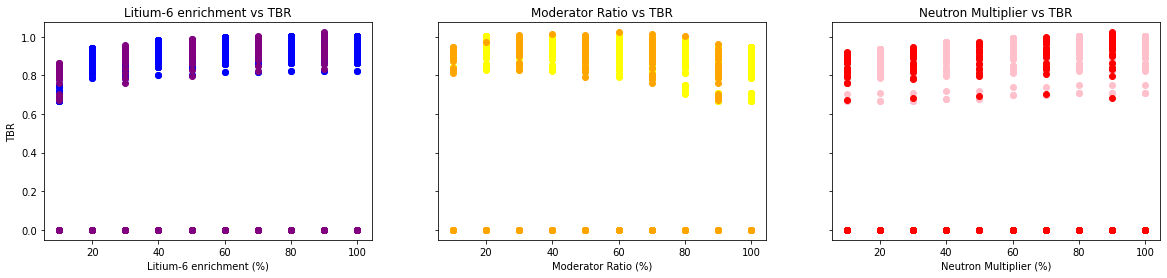

In [175]:
# Plot each features vs TBR
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(20, 4))
ax1.scatter(df_val.Li6_enrichment*100, df_val.Tbr_XGBoost, c = "blue", marker = "o")
ax1.scatter(df_val.Li6_enrichment*100, df_val.Tbr_OpenMC, c = "purple", marker = "o")
ax1.set_title("Litium-6 enrichment vs TBR")
ax1.set(xlabel='Litium-6 enrichment (%)', ylabel='TBR')
ax2.scatter(df_val.Moderator_ratio*100, df_val.Tbr_XGBoost, c = "yellow", marker = "o")
ax2.scatter(df_val.Moderator_ratio*100, df_val.Tbr_OpenMC, c = "orange", marker = "o")
ax2.set_title("Moderator Ratio vs TBR")
ax2.set(xlabel='Moderator Ratio (%)')
ax3.scatter(df_val.Neutron_multiplier*100, df_val.Tbr_XGBoost, c = "pink", marker = "o")
ax3.scatter(df_val.Neutron_multiplier*100, df_val.Tbr_OpenMC, c = "red", marker = "o")
ax3.set_title("Neutron Multiplier vs TBR")
ax3.set(xlabel='Neutron Multiplier (%)')

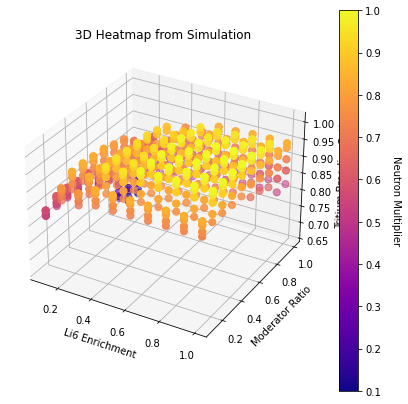

In [148]:
# Read the dataset
x = df_val["Li6_enrichment"].tolist()
y = df_val["Moderator_ratio"].tolist()
z = df_val["Tbr_XGBoost"].tolist()

colo = df_val["Neutron_multiplier"].tolist()

# Creating 3d figures
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Configuring colorbar
color_map = cm.ScalarMappable(cmap=cm.plasma)
color_map.set_array(colo)

# Creating the heatmap
img = ax.scatter(x, y, z, marker='o', s=50, c=z, cmap=cm.plasma)
heatmap = plt.colorbar(color_map)
heatmap.set_label('Neutron Multiplier', rotation=270, labelpad=20)

# Adding title and labels
ax.set_title("3D Heatmap from Simulation")
ax.set_xlabel('Li6 Enrichment')
ax.set_ylabel('Moderator Ratio')
ax.set_zlabel('Tritium Breeding Ratio')

# Displaying plot
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

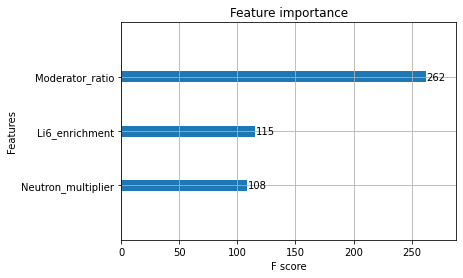

In [150]:
# xgb.plot_importance(model)
xgb.plot_importance(new_model)